In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

# Examples

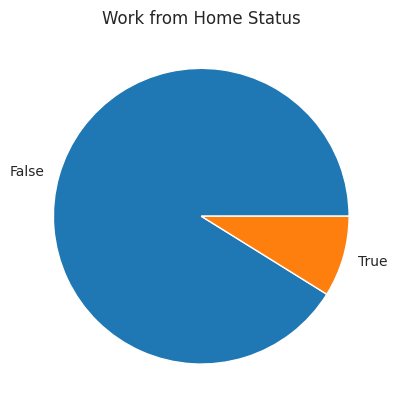

In [2]:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

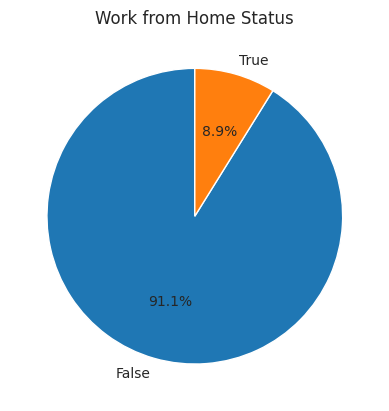

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

In [4]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


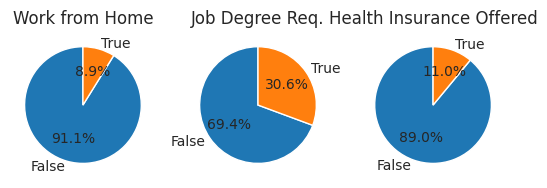

In [5]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

# Exercises

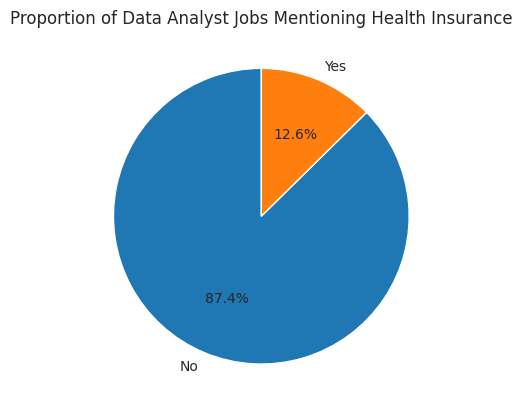

In [12]:
# Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:
# 
# Create a new DataFrame called df_DA that only gets Data Analyst roles.
# Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
# Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
# Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
health_insurance_counts = df_DA['job_health_insurance'].value_counts()
plt.pie(health_insurance_counts, startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()

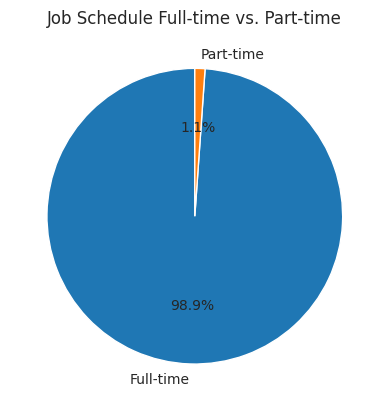

In [22]:
# Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
# Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
# Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
# Add a title 'Job Schedule Full-time vs. Part-time'.

df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(job_schedule_counts, labels=job_schedule_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Job Schedule Full-time vs. Part-time')
plt.show()

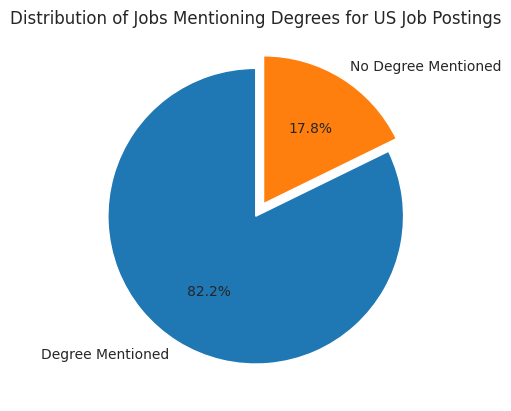

In [33]:
# Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.
# Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
# Use the job_no_degree_mention column for this purpose.
# Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())
# Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

df_US = df[df['job_country'] == 'United States'].copy()
degree_count = df_US['job_no_degree_mention'].value_counts()
plt.pie(degree_count, labels=['Degree Mentioned', 'No Degree Mentioned'], startangle=90, autopct='%1.1f%%', explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()